In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import IPython
import sys

In [2]:
#loading the datasets
dataset = pd.read_csv("Hackathon_2022/resources/Dataset.csv")
interactions = pd.read_csv("Hackathon_2022/resources/Interactions.csv")


In [3]:
photoclicks = pd.read_csv("Hackathon_2022/resources/Photos.tsv", sep='\t')

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [5]:
photoclicks.head(5)

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [6]:
photoclicks.shape

(28888, 2)

In [7]:
photoclicks['photo_urls'] = photoclicks['photo_urls'].str.rstrip('.img')

In [8]:
photoclicks.head(5)

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [9]:
photoclicks.photo_urls = photoclicks.photo_urls.fillna('no image')

In [10]:
import glob
import os

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [13]:
def text_transformation(photoclicks):
    corpus = []
    for item in train_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [57]:
import re
from bs4 import BeautifulSoup
import unicodedata
import contractions
import spacy
import nltk

#library to remove emoji
import demoji
demoji.download_codes()

import re
from emot.emo_unicode import UNICODE_EMOJI

nlp = spacy.load('en')
ps = nltk.porter.PorterStemmer()



contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def replace_specialchars(text):
    text = text.replace("$&@*#","vulgar and offensive word")
    return text

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " ".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    #[s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def text_transformation(photoclicks):
    text = []
    for item in train_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        text.append(' '.join(str(x) for x in new_item))
    return text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def expand_contractions(text):
    return contractions.fix(text)


def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def simple_stemming(text, stemmer=ps):
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

def extract_data_from_report3(text):
    soup = BeautifulSoup(open(text), "html.parser")

def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [67]:
import tqdm

def text_pre_processor(text, html_strip=True, replace_contractions = True,replace_chars = True,
                       replace_emoji = True, accented_char_removal=True, contraction_expansion=True,
                       text_lower_case=True, text_stemming=False, text_lemmatization=True, 
                       special_char_removal=True, remove_digits=True, stopword_removal=True, 
                       stopword_list=['title', 'name', 'display']):
    
    # strip HTML
    if html_strip:
        text = strip_html_tags(text)
    
    # replacing contractions
    if replace_contractions:
        text = expand_contractions(text)
        
    # replacing special characters
    if replace_chars:
        text = replace_specialchars(text)
        
    # replacing emojis
    if replace_emoji:
        text = convert_emojis(text)
    
    # remove extra newlines (often might be present in really noisy text)
    text = text.translate(text.maketrans("\n\t\r", "   "))
    
    # remove accented characters
    if accented_char_removal:
        text = remove_accented_chars(text)
    
    # expand contractions    
    if contraction_expansion:
        text = expand_contractions(text)     
    
    # lemmatize text
    if text_lemmatization:
        text = spacy_lemmatize_text(text) 
        
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        text = special_char_pattern.sub(" \\1 ", text)
        text = remove_special_characters(text, remove_digits=remove_digits)  
        
    # stem text
    if text_stemming and not text_lemmatization:
        text = simple_stemming(text)
        
    # lowercase the text    
    if text_lower_case:
        text = text.lower()
        
        
    # remove stopwords
    if stopword_removal:
        text = remove_stopwords(text, is_lower_case=text_lower_case, 
                                stopwords=stopword_list)
        
    # remove extra whitespace
    text = re.sub(' +', ' ', text)
    text = text.strip()
    
    
    return text

In [68]:
text_pre_processor

<function __main__.text_pre_processor(text, html_strip=True, replace_contractions=True, replace_chars=True, replace_emoji=True, accented_char_removal=True, contraction_expansion=True, text_lower_case=True, text_stemming=False, text_lemmatization=True, special_char_removal=True, remove_digits=True, stopword_removal=True, stopword_list=['title', 'name', 'display'])>

In [69]:
photoclicks["clean_text"] = photoclicks.photo_urls.apply(text_pre_processor)

In [70]:
from concurrent import futures
import threading

def parallel_preprocessing(idx, doc, total_docs):
    return text_pre_processor(doc)


def pre_process_documents_parallel(documents):
    total_docs = len(documents)
    docs_input = [[idx, doc, total_docs] for idx, doc in enumerate(documents)]
    
    ex = futures.ThreadPoolExecutor(max_workers=None)
    print('preprocessing: starting')
    norm_descriptions_map = ex.map(parallel_preprocessing, 
                                   [record[0] for record in docs_input],
                                   [record[1] for record in docs_input],
                                   [record[2] for record in docs_input])
    print("preprocessing: end")
    norm_descriptions = list(norm_descriptions_map)
    return norm_descriptions

In [71]:
corpus = pre_process_documents_parallel(photoclicks.photo_urls)

preprocessing: starting
preprocessing: end


In [72]:
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re

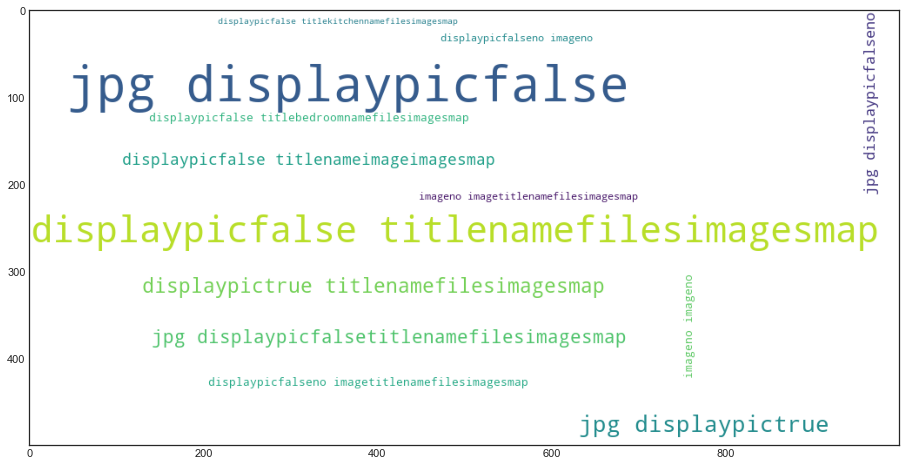

In [73]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [74]:
photoclicks.head()

,property_id,photo_urls,clean_text
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006...",titlebalconynameimg jpgimagesmap originalfffde...
1,ff8080814702d3d10147068359d200cd,no image,no image
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c...",titlebedroomnameffcfbfalarge jpgimagesmap medi...
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7...",titlebedroomnamescreenshot jpgimagesmap medium...
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8...",titleothernameffaaafaalarge jpgimagesmap thumb...


In [66]:
photoclicks['clean_text'].to_csv("Hackathon_2022/resources/photos_preprocessed.csv", index = False)